<hr>
<h2><b><center>Importing Libraries</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

<hr>
<h2><b><center>Loading Dataset</center>

In [2]:
df=pd.read_csv("Fraud_detection.csv")
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0


<hr>
<h3><b><center>Exploratory Analysis</center>

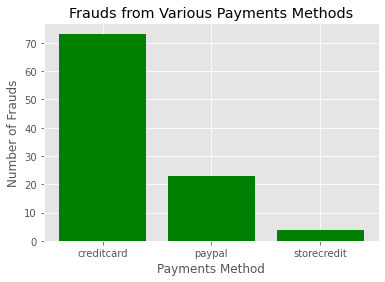

Total Number of crimes : 
  creditcard     410
paypal         129
storecredit     21
Name: paymentMethod, dtype: int64
%age of crimes :  1.427806532214885


In [3]:
filt = df["label"]==1
x_1=df[filt]["paymentMethod"].value_counts().index
y_1=df[filt]["paymentMethod"].value_counts().values/df[filt]["paymentMethod"].value_counts().values.sum()*100
plt.style.use('ggplot')
plt.bar(x_1,y_1,color='green')
plt.title("Frauds from Various Payments Methods")
plt.xlabel("Payments Method")
plt.ylabel("Number of Frauds")
plt.show()
print(f"Total Number of crimes : \n ",df[filt]["paymentMethod"].value_counts())
print("%age of crimes : ",df[filt]["paymentMethod"].value_counts().sum()/39221*100)

From all of the transactions 1.4% of them are Fraudulent. <br>
& More Than 70% of Frauds are commited from Credit Cards

<hr>
<h2><b><center>Data Preprocessing</center>

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of Logistic Regression Model is : ",accuracy_score(y_test,y_pred)*100)
acc=cross_val_score(estimator=log_reg,X=x_test,y=y_test,cv=10)
print("K-fold(k=10) cross Validation of Logistic Regression Model is : ",acc.mean()*100)


[[11605     3]
 [  159     0]]
Accuracy Score of Logistic Regression Model is :  98.62326846264978
K-fold(k=10) cross Validation of Logistic Regression Model is :  98.64027216664064


<i>Not a Good Model because it predicted all the outcomes as 0 (non fraudulent)</i> 

# KNN Classification model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn_classi=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
kn_classi.fit(x_train,y_train)
y_pred=kn_classi.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of KNN Classification Model is : ",accuracy_score(y_test,y_pred)*100)
Kn_acc=cross_val_score(estimator=kn_classi,X=x_test,y=y_test,cv=10)
print("K-fold(k=10) cross Validation of KNN Classification Model is : ",Kn_acc.mean()*100)

[[11587    21]
 [   13   146]]
Accuracy Score of KNN Classification Model is :  99.71105634401292
K-fold(k=10) cross Validation of KNN Classification Model is :  99.49860275461076


<i>It gave 13 False Negative prediction</i>

# SVM Classification Model

In [10]:
from sklearn.svm import SVC 
sv_classi=SVC(kernel='poly',random_state=42)
sv_classi.fit(x_train,y_train)
y_pred = sv_classi.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of Sigmoid SVM model is :",accuracy_score(y_test,y_pred)*100)
sv_acc=cross_val_score(estimator=sv_classi,X=x_test,y=y_test,cv=10)
print("K-fold (k=10) score of model is : ",sv_acc.mean()*100)

[[11608     0]
 [  159     0]]
Accuracy Score of Sigmoid SVM model is : 98.64876349111923
K-fold (k=10) score of model is :  98.6317687652801


<i>Not a Good Model because it predicted all the outcomes as 0 (non fraudulent)</i> 

In [11]:
from sklearn.svm import SVC 
sv_class=SVC(kernel='rbf',random_state=0)
sv_class.fit(x_train,y_train)
y_pred = sv_class.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of rbf SVM model is :",accuracy_score(y_test,y_pred)*100)
sv_acci=cross_val_score(estimator=sv_class,X=x_test,y=y_test,cv=10)
print("K-fold (k=10) score of model is : ",sv_acci.mean()*100)

[[11608     0]
 [  159     0]]
Accuracy Score of rbf SVM model is : 98.64876349111923
K-fold (k=10) score of model is :  98.64876834336111


<i>Not a Good Model because it predicted all the outcomes as 0 (non fraudulent)</i> 

# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
bay_classi=GaussianNB()
bay_classi.fit(x_train,y_train)
y_pred=bay_classi.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of rbf SVM model is :",accuracy_score(y_test,y_pred)*100)
sv_acc=cross_val_score(estimator=bay_classi,X=x_test,y=y_test,cv=10)
print("K-fold (k=10) score of model is : ",sv_acc.mean()*100)

[[11608     0]
 [    3   156]]
Accuracy Score of rbf SVM model is : 99.97450497153055
K-fold (k=10) score of model is :  99.9660152931181


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of rbf SVM model is :",accuracy_score(y_test,y_pred)*100)
sv_ac=cross_val_score(estimator=tree,X=x_test,y=y_test,cv=10)
print("K-fold (k=10) score of model is : ",sv_ac.mean()*100)

[[11608     0]
 [    0   159]]
Accuracy Score of rbf SVM model is : 100.0
K-fold (k=10) score of model is :  100.0


# Random Forest 


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score of rbf SVM model is :",accuracy_score(y_test,y_pred)*100)
sv_a=cross_val_score(estimator=rf,X=x_test,y=y_test,cv=10)
print("K-fold (k=10) score of model is : ",sv_a.mean()*100)

[[11608     0]
 [    0   159]]
Accuracy Score of rbf SVM model is : 100.0
K-fold (k=10) score of model is :  100.0


# XGBoost
Gradient Boosting 

In [16]:
from  xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)*100

100.0

# CatBoost

In [18]:
from  catboost import CatBoostClassifier
xgb = CatBoostClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)*100

Learning rate set to 0.042386
0:	learn: 0.5302129	total: 42.1ms	remaining: 42.1s
1:	learn: 0.4058733	total: 57.1ms	remaining: 28.5s
2:	learn: 0.3094031	total: 74.4ms	remaining: 24.7s
3:	learn: 0.2411898	total: 89.2ms	remaining: 22.2s
4:	learn: 0.1791973	total: 104ms	remaining: 20.6s
5:	learn: 0.1349649	total: 119ms	remaining: 19.7s
6:	learn: 0.1011646	total: 139ms	remaining: 19.7s
7:	learn: 0.0792570	total: 154ms	remaining: 19.1s
8:	learn: 0.0614312	total: 173ms	remaining: 19s
9:	learn: 0.0460944	total: 183ms	remaining: 18.1s
10:	learn: 0.0342942	total: 193ms	remaining: 17.4s
11:	learn: 0.0277492	total: 211ms	remaining: 17.4s
12:	learn: 0.0221802	total: 229ms	remaining: 17.4s
13:	learn: 0.0177336	total: 245ms	remaining: 17.3s
14:	learn: 0.0142429	total: 263ms	remaining: 17.3s
15:	learn: 0.0116806	total: 281ms	remaining: 17.3s
16:	learn: 0.0096716	total: 296ms	remaining: 17.1s
17:	learn: 0.0082306	total: 310ms	remaining: 16.9s
18:	learn: 0.0068689	total: 326ms	remaining: 16.8s
19:	learn

100.0

<h4>Thus, Decision Tree, Random Forest, XGBoost, CatBoost are the Best fit Model as they predicted our result with 100% Accuracy</h4>
<i><u>Reason for 100% Accuracy is:</u><br></i><br>
Our Decision Tree/Random Forest model are able to divide our data based
on Entropy(Information gained) such that, they are able to generate Leaf<br>
Nodes which contains pure segregated pairs of 0(non-fraudulent) & 1(fraudulent).